In [426]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.naive_bayes import GaussianNB
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import root_mean_squared_error
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
random.seed(123)

In [427]:
houses_df = pd.read_csv('train.csv')

Calculamos la cantidad de null values que tengan nuestros datos y en que variables

In [428]:
null_counts = houses_df.isnull().sum()
# print(null_counts)
null_counts = null_counts[null_counts > 0]
print(null_counts)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Reemplazamos los valores de las variables categoricas a números y rellenamos los null values con ceros

In [429]:
for i in null_counts.index:
    print(i)
    houses_df = houses_df.apply(pd.to_numeric, errors='coerce')
    houses_df = houses_df.fillna(0)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


Verificamos si hay valores atípicos en nuestro dataset

<Axes: >

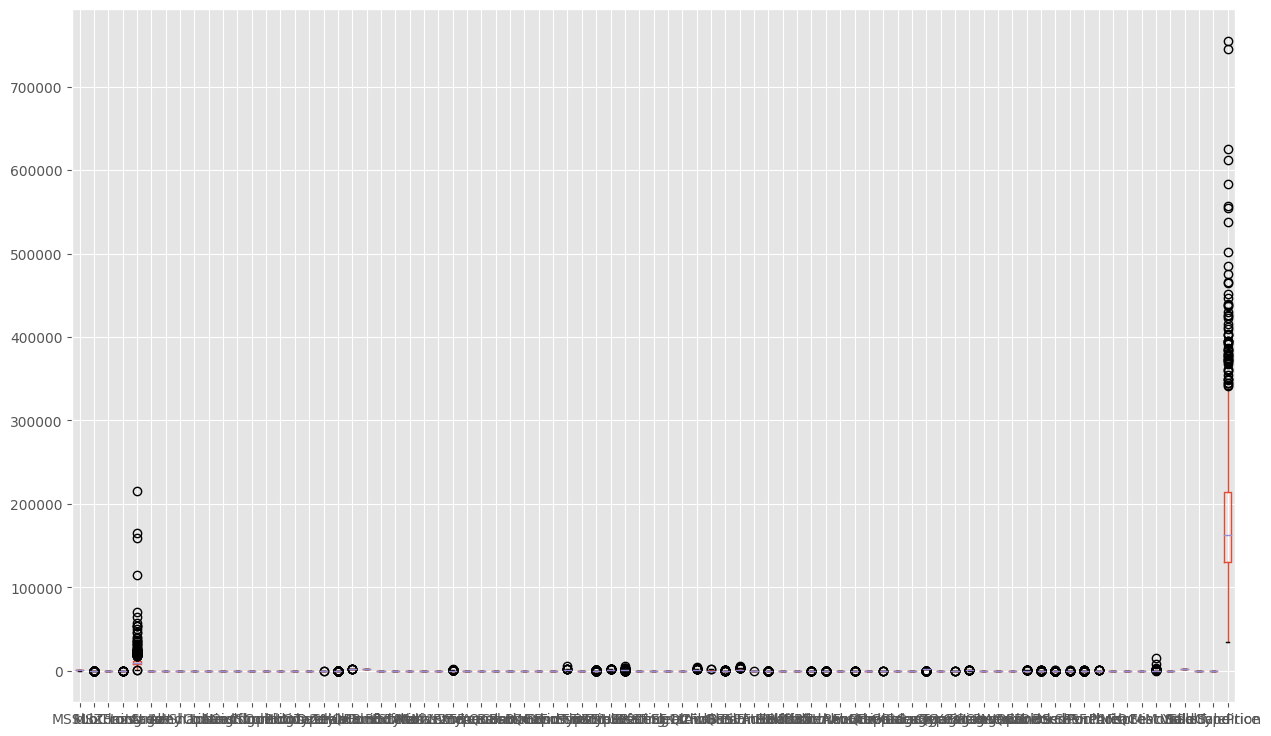

In [430]:
houses_df.boxplot()

Vemos que tenemos 2 campos con valores atípicos

<Axes: >

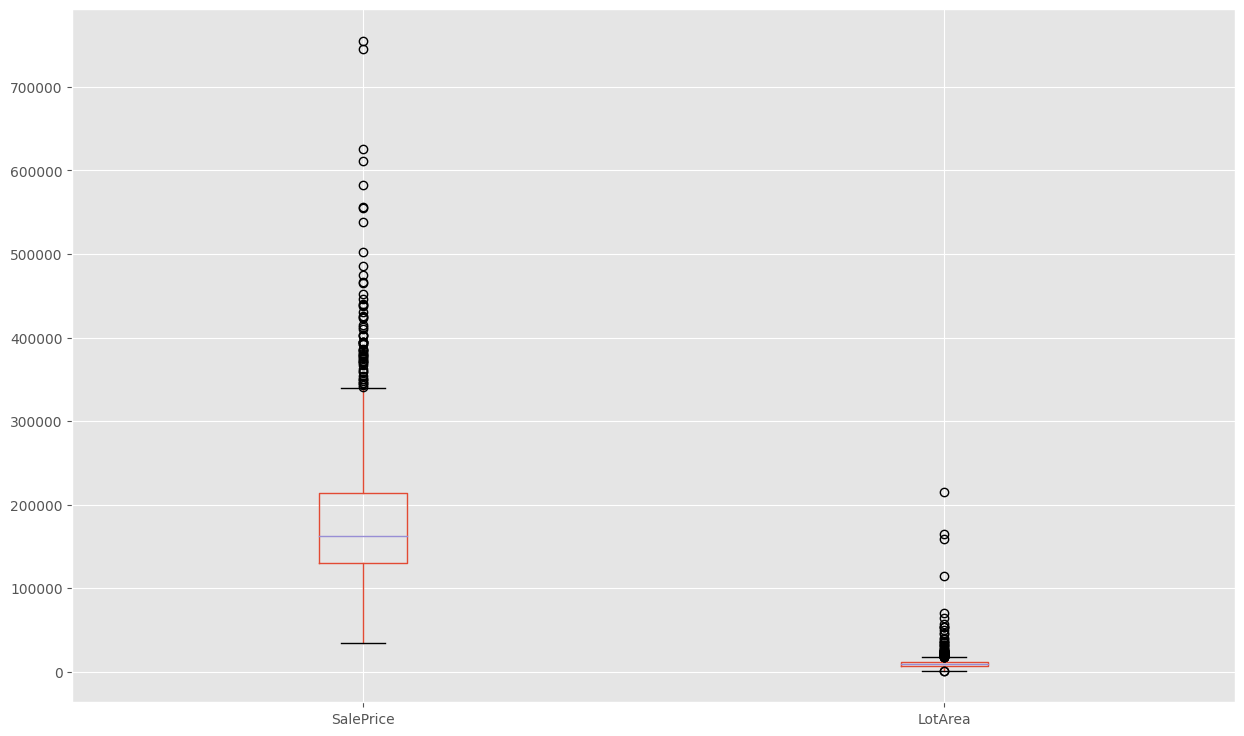

In [431]:
houses_df[["SalePrice", "LotArea"]].boxplot()

Eliminamos los valores que puedan arruinar nuestras predicciones

In [432]:
houses_df = houses_df[houses_df["SalePrice"] < 700000]
houses_df = houses_df[houses_df["LotArea"] < 100000]

Separamos nuestras variables de las variables objetivo

In [433]:
# Define the target
y = houses_df.pop('SalePrice')

# Remove the target from the current DataFrame
X = houses_df
random.seed(1234)

Hacemos la división de nuestro set de datos

In [434]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

Separamos nuestras variables en categoricas y numéricas

In [435]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(houses_df)
categorical_columns = categorical_columns_selector(houses_df)

In [436]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standar-scaler', numerical_preprocessor,numerical_columns)
    ])

In [437]:
#param_grid = {"max_depth": np.arange(2, 10, 1)}
pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('regressor',GaussianNB())])
#params = [{
#    "regressor__max_depth": np.arange(2, 10, 1)
#}]
pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('one-hot-encoder',
                                    OneHotEncoder(handle_unknown='ignore'), []),
                                   ('standar-scaler', StandardScaler(),
                                    ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage',
                                     'LotArea', 'Street', 'Alley', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'OverallQual', 'OverallCond', 'YearBuilt',
                                     'YearRemodAdd', 'RoofStyle', 'RoofMatl',
                                     'Exterior1st', 'Exterior2nd', 'MasVnrType',
                                     'MasVnrArea', 'ExterQual', 'ExterCond',
                                 

Realizamos la predicción

In [438]:
modelo = pipeline.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
rmse = root_mean_squared_error(y_test,y_pred)

In [439]:
minimo = y.min()
print("Valor mínimo: ", minimo)
maximo = y.max()
print("Valor máximo: ", maximo)

std_dev = np.std(y)
print("Desviación estándar: ", std_dev)

print("Valor RMSE: ", rmse)

Valor mínimo:  34900
Valor máximo:  625000
Desviación estándar:  76434.20276151803
Valor RMSE:  51026.04816867234


Sacamos la variable categórica del SalePrice

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


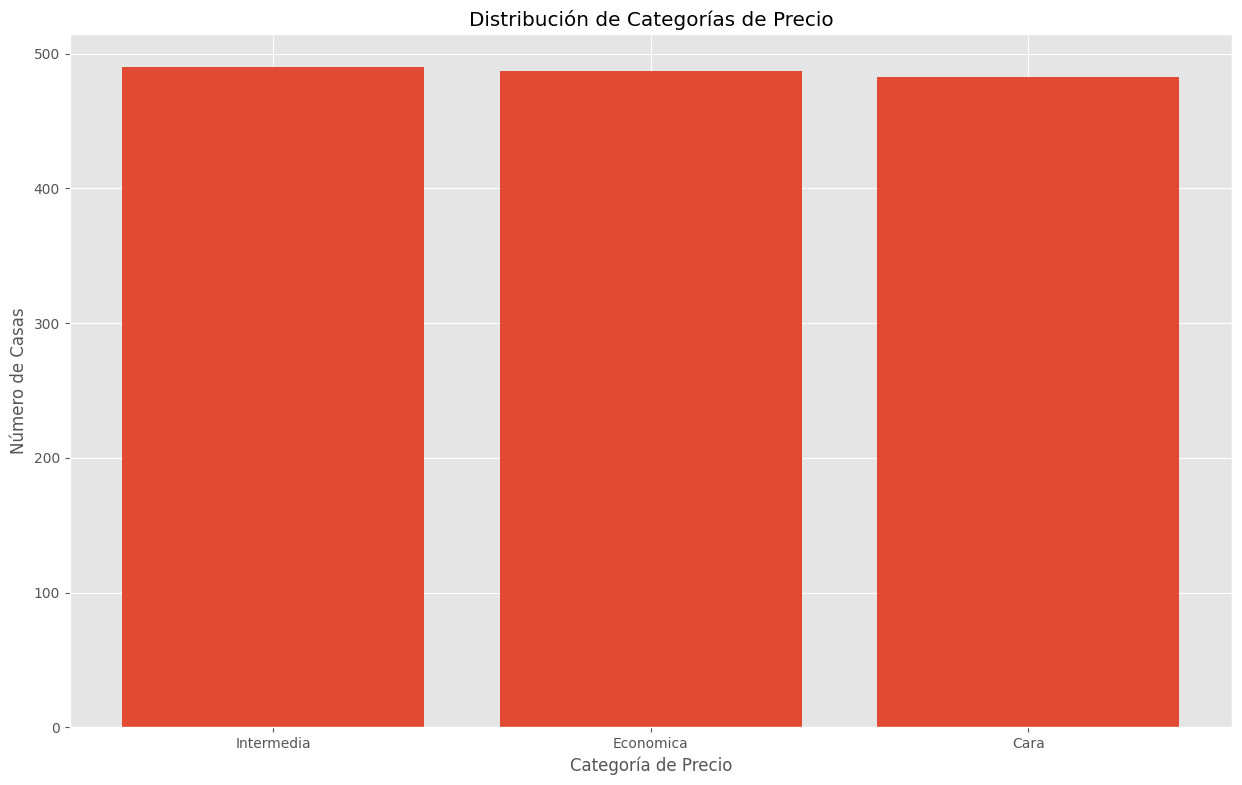

In [440]:
houses_df = pd.read_csv('train.csv', encoding='latin1')

for i in null_counts.index:
    print(i)
    houses_df = houses_df.apply(pd.to_numeric, errors='coerce')
    houses_df = houses_df.fillna(0)

# Define the number of categories
num_categories = 3

# Define the category names
category_names = ['Economica', 'Intermedia', 'Cara']

# Create a new column in the DataFrame for the categories
houses_df['Precio_Categoria'] = pd.qcut(houses_df['SalePrice'], q=num_categories, labels=category_names)

# Verificar la distribución de las categorías
plt.bar(houses_df['Precio_Categoria'].value_counts().index, houses_df['Precio_Categoria'].value_counts().values)
plt.xlabel('Categoría de Precio')
plt.ylabel('Número de Casas')
plt.title('Distribución de Categorías de Precio')
plt.show()

Convertimos los valores de la variable categórica en valores numéricos

In [441]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Precio_Categoria' column
houses_df['Precio_Categoria'] = le.fit_transform(houses_df['Precio_Categoria'])

houses_df['Precio_Categoria']

0       0
1       2
2       0
3       2
4       0
       ..
1455    2
1456    0
1457    0
1458    2
1459    2
Name: Precio_Categoria, Length: 1460, dtype: int64

In [442]:
# Define the target
y = houses_df.pop('Precio_Categoria')

# Remove the target from the current DataFrame
X = houses_df
random.seed(1234)

In [443]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [444]:
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

In [445]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('Accuracy: ',accuracy)

Confusion matrix for Naive Bayes
 [[130   2  20]
 [  0 144   6]
 [  7  58  71]]
Accuracy:  0.7876712328767124


Realizamos cross validation de los datos para tunear nuestra predicción

In [446]:
params =  [{
    "regressor__var_smoothing": np.logspace(0,-9, num=100)
}]
modelo = GridSearchCV(pipeline,param_grid=params,n_jobs=2, cv=5,scoring="neg_root_mean_squared_error")
modelo.fit(X_train,y_train)
modelo.best_params_

{'regressor__var_smoothing': 0.8111308307896871}

In [447]:
print(modelo.best_estimator_)
print('best score:')
print(modelo.best_score_)
y_mejor_pred = modelo.best_estimator_.predict(X_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standar-scaler',
                                                  StandardScaler(),
                                                  ['Id', 'MSSubClass',
                                                   'MSZoning', 'LotFrontage',
                                                   'LotArea', 'Street', 'Alley',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyl

In [448]:
minimo = y.min()
print("Valor mínimo: ", minimo)
maximo = y.max()
print("Valor máximo: ", maximo)

std_dev = np.std(y)
print("Desviación estándar: ", std_dev)

rmse_tunned = root_mean_squared_error(y_test,y_mejor_pred)
print("Valor RMSE: ", rmse_tunned)

Valor mínimo:  0
Valor máximo:  2
Desviación estándar:  0.8163426784978834
Valor RMSE:  0.7865884954582126
